# Linear regression in python

# Nová sekce

In this exercise we will try to predict person height based on their weight.

**Usefull links**

- [Numpy](http://docs.scipy.org/doc/)
- [Matplotlib](http://matplotlib.org/)
- [Pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)

## Taks 1. Data investigation with pandas

In this task we are going to analyze weight and height of ~25K teenagers data taken from [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights).

In [72]:
!pip install seaborn

In [73]:
import scipy
import scipy.optimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
data = pd.read_csv('weights_heights.csv')

In [75]:
data[["Height", "Weight"]]

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [76]:
data.head(15)

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


In [77]:
data[["Height", "Weight"]].describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [78]:
data.columns

Index(['Index', 'Height', 'Weight'], dtype='object')

In [79]:
data[["Height", "Weight"]].corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


Let's take a closer look on our data. A first thing we need could do is to build a histogram.


<Axes: title={'center': 'Height (inch.) distribution'}>

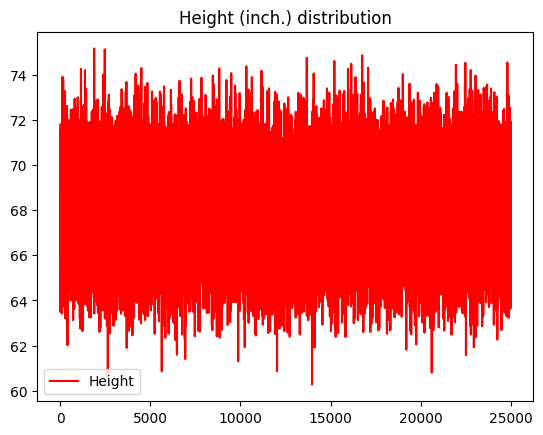

In [80]:
data.plot(y='Height', color='red', title='Height (inch.) distribution')

<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

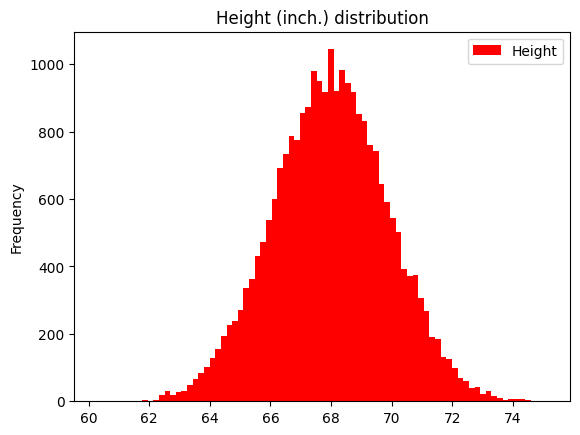

In [81]:
data.plot(
    y='Height', color='red', title='Height (inch.) distribution',
    kind='hist',
    bins=80
)

<Axes: title={'center': 'Weights'}>

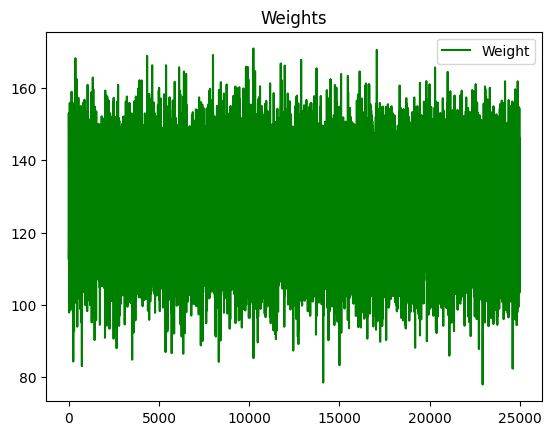

In [82]:
data.plot(y='Weight', color='green', title='Weights')

<Axes: title={'center': 'Weights'}, ylabel='Frequency'>

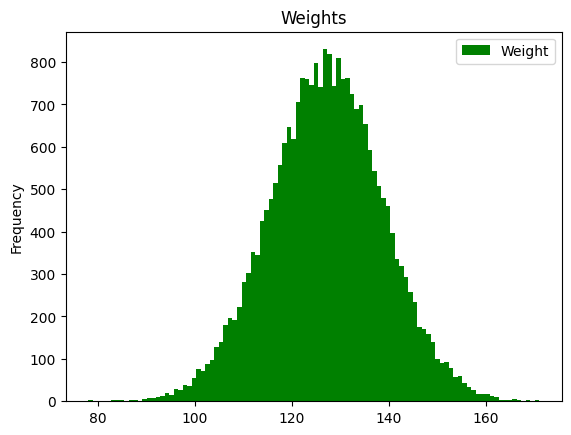

In [83]:
data.plot(y='Weight', color='green', title='Weights', kind='hist', bins=100)

<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

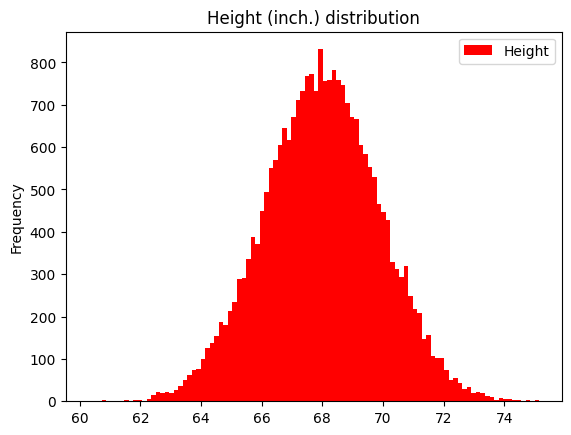

In [84]:
data.plot(y='Height', kind='hist', bins=100, color='red', title='Height (inch.) distribution')

<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

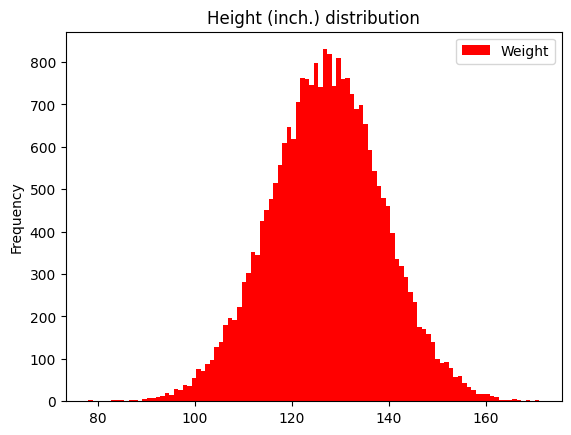

In [85]:
data.plot.hist(y='Weight', color='red', bins=100, title='Height (inch.) distribution')

We could also take a look at fist n rows in our dataset. With pandas this is extremely easy.

In [86]:
data.head(5)

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


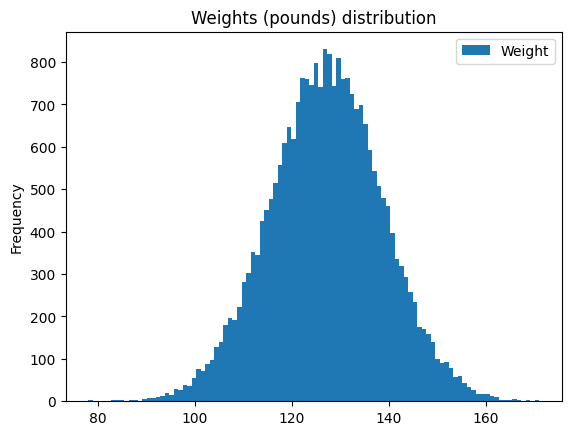

In [87]:
data.plot.hist(bins=100, title='Weights (pounds) distribution', y='Weight')
plt.show()

To understand our data even deeper let's add a third property. Which in our case will be body mass index ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)).

In [88]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [89]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'],
                                              row['Weight']), axis=1)

In [90]:
data.head(10)

,Index,Height,Weight,BMI
0,1,65.78331,112.9925,18.357573
1,2,71.51521,136.4873,18.762577
2,3,69.39874,153.0269,22.338895
3,4,68.21660,142.3354,21.504526
4,5,67.78781,144.2971,22.077581
5,6,68.69784,123.3024,18.368870
6,7,69.80204,141.4947,20.417428
7,8,70.01472,136.4623,19.571813
8,9,67.90265,112.3723,17.134953
9,10,66.78236,120.6672,19.022290


In [91]:
data[["Height", "Weight", "BMI"]].corr()

,Height,Weight,BMI
Height,1.000000,0.502859,-0.121519
Weight,0.502859,1.000000,0.795477
BMI,-0.121519,0.795477,1.000000


Having tree properties we could create a 3x3 plot mattri for each pair.

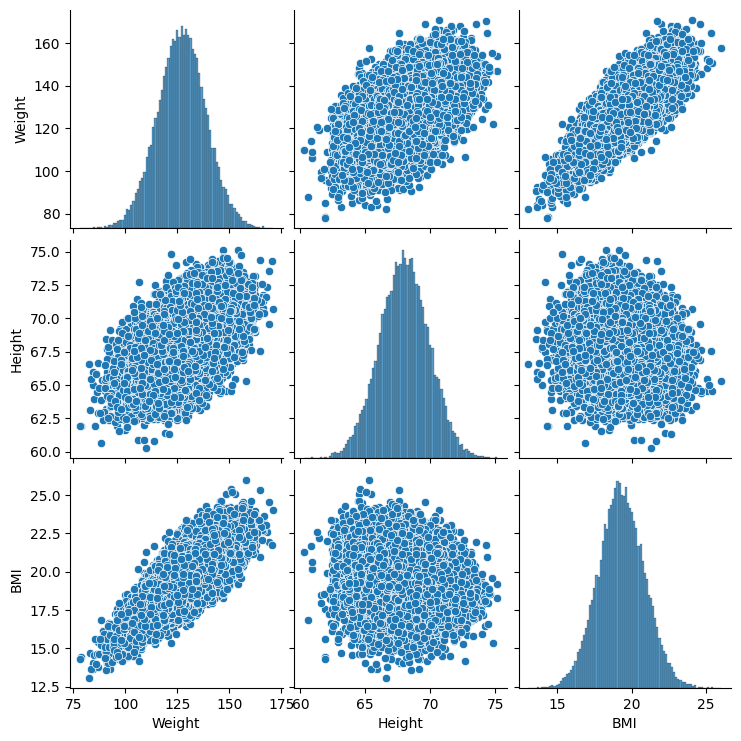

In [92]:
sns.pairplot(data[["Weight", "Height", "BMI"]])
plt.show()

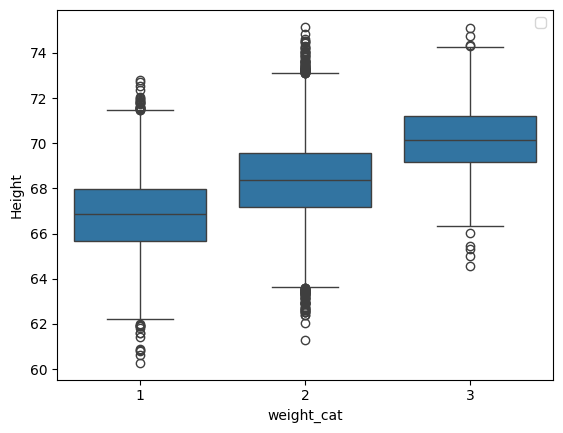

In [93]:
def weight_category(weight):
    if weight < 120.0:
        return 1
    elif weight >= 150:
        return 3
    return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(x='weight_cat', y='Height', data=data)

plt.legend()
plt.show()

Now, let's create a scatter plot which will show us relation between weight and height.

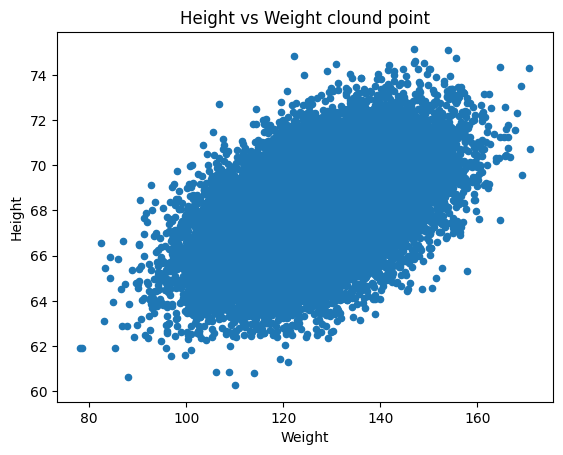

In [94]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height vs Weight clound point')
plt.show()

## Task 2. Minimization of squared error.

Let us assume that there is a liniar dependency between weight and height which can be written as $y = w_0 + w_1 * x$.

Having such function we can also define squared error as follows:

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$


Here $n$ is the number of examples, $y_i$ and $x_i$ are height and weight of $i$-th person.

Let's organize our data in a matrix form. This will help us in further computations.

In [95]:
X = np.array([(x, 1) for x in data['Weight']])
Y = data['Height']

In [96]:
X

array([[112.9925,   1.    ],
       [136.4873,   1.    ],
       [153.0269,   1.    ],
       ...,
       [118.2655,   1.    ],
       [132.2682,   1.    ],
       [124.874 ,   1.    ]])

In [97]:
def error(w, X, Y):
    '''
    This function calculates square error (Y - X * w) ^ 2,
    where X is a matrix of type:
    X = [
        x1 1
        x2 1
        ....
        xn 1
    ].
    w -- is vector-column of linear equations parameters,
    where w1 is slope and w0 is interception:
    w = [
        w1
        w0
    ].
    Y is a vector-column of particular y values.
    '''
    err = Y - np.matmul(X, w)
    return err.dot(err)

In [98]:
error(np.array([50, 0.16]), X, Y)

996358663546.7957

Let's play around with some parameters and plot 2 lines with the following parameters ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$.

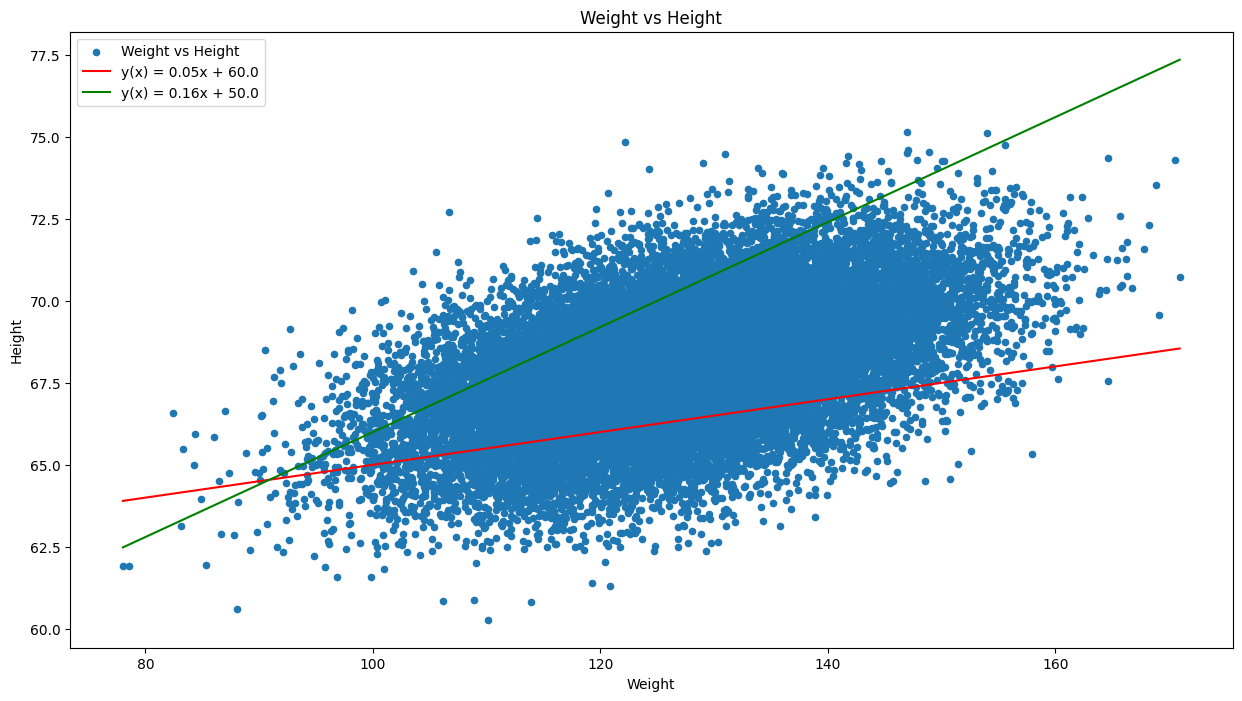

In [99]:
data.plot(y='Height', x='Weight', kind='scatter', figsize=(15, 8), label='Weight vs Height')

W1 = np.array((60, 0.05))
W2 = np.array((50, 0.16))

x = np.linspace(min(data['Weight']), max(data['Weight']), 100)
y1 = W1[0] + x * W1[1]
y2 = W2[0] + x * W2[1]

plt.plot(x, y1, '-r', label='y(x) = %sx + %s' % (W1[1], W1[0]))
plt.plot(x, y2, '-g', label='y(x) = %sx + %s' % (W2[1], W2[0]))

plt.title('Weight vs Height')
plt.legend()
plt.show()

Now, let's see what our error function looks like when one of the parameters is fixed. Let $w_0 = 50.0$.

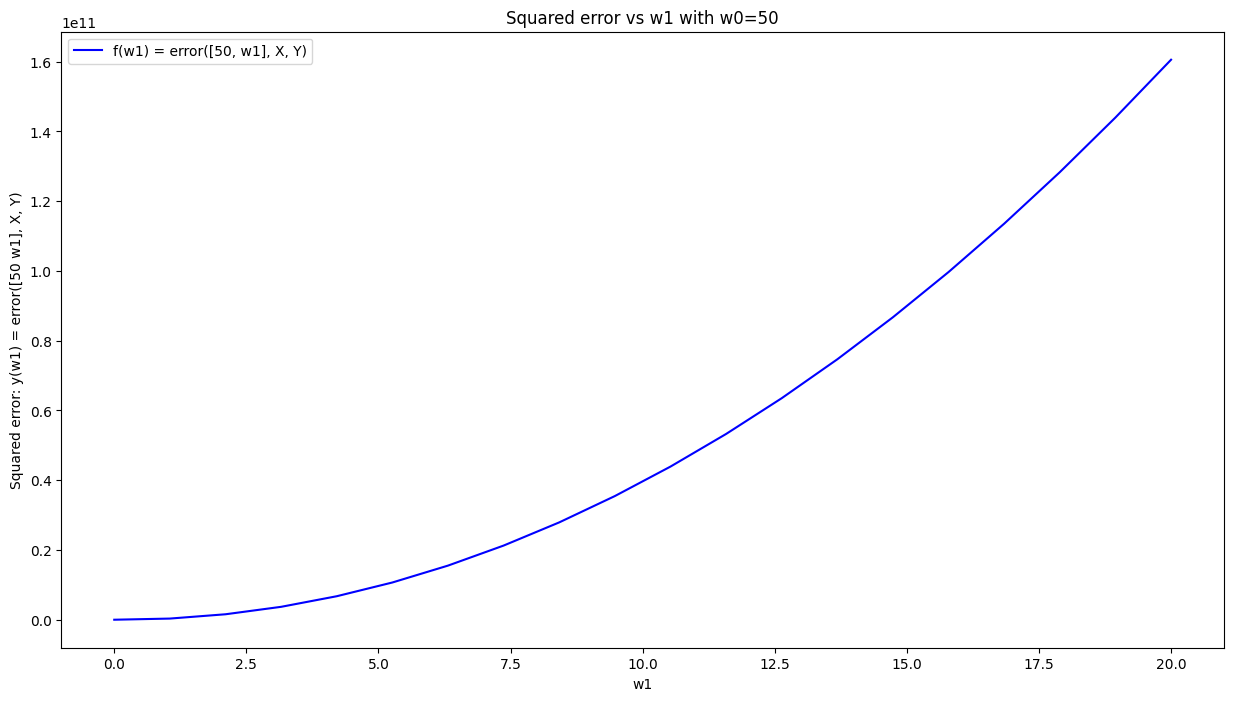

In [100]:
w0 = 50.0

domain = np.linspace(0, 20, 20)
y = np.array([error(np.array([w1, w0]), X, Y) for w1 in domain])

plt.figure(figsize=(15, 8))

plt.plot(domain, y, '-b', label="f(w1) = error([50, w1], X, Y)")

plt.title('Squared error vs w1 with w0=50')

plt.legend()
plt.xlabel('w1')
plt.ylabel('Squared error: y(w1) = error([50 w1], X, Y)')
plt.show()

Assuming $w_0 = 50$ let's find the optimal slope of the line in range from -5 to 5.

In [101]:
def slope_error(w1, X, Y):
    w0 = 50.0
    return error(np.array((w1, w0)), X, Y)


result = scipy.optimize.minimize_scalar(
    slope_error, args=(X, Y), bounds=(-5.0, 5.0),
)

print(result)

w1 = result.x

print('Interception w0 =', w0)
print('Slope w1 =', w1)

 message: Solution found.
 success: True
  status: 0
     fun: 79512.21728699502
       x: 0.14109203728834374
     nit: 6
    nfev: 6
Interception w0 = 50.0
Slope w1 = 0.14109203728834374


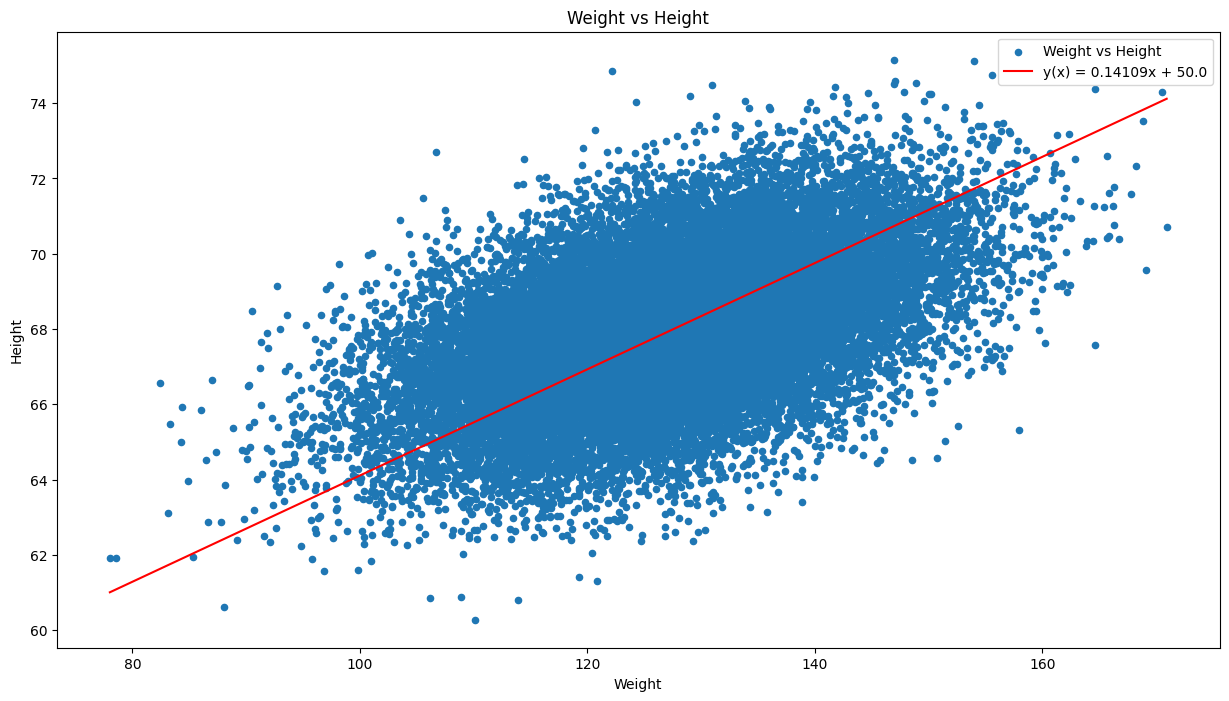

In [102]:
x = np.linspace(min(data['Weight']), max(data['Weight']), 100)
y = w0 + x * w1

data.plot(y='Height', x='Weight', kind='scatter', figsize=(15, 8), label='Weight vs Height')
plt.plot(x, y, '-r', label='y(x) = %sx + %s' % (round(w1, 5), w0))

plt.title('Weight vs Height')
plt.legend()
plt.show()

Let's try to make a 3D plot of error function. This will give us even more intuition about finding optimal parameters which will describe our data.

But before we plot our error function, let's try out another example.

Make a 3D plot of $z(x,y) = sin(\sqrt{x^2+y^2})$ for $x$ and $y$ taken from range $[-5,5]$.

In [103]:
from mpl_toolkits.mplot3d import Axes3D

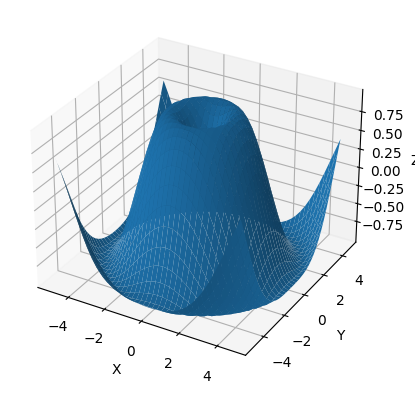

In [104]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

surf = ax.plot_surface(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [105]:
x

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])

In [106]:
y

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.75, -4.75, -4.75, ..., -4.75, -4.75, -4.75],
       [-4.5 , -4.5 , -4.5 , ..., -4.5 , -4.5 , -4.5 ],
       ...,
       [ 4.25,  4.25,  4.25, ...,  4.25,  4.25,  4.25],
       [ 4.5 ,  4.5 ,  4.5 , ...,  4.5 ,  4.5 ,  4.5 ],
       [ 4.75,  4.75,  4.75, ...,  4.75,  4.75,  4.75]])

Now, let's plot our error function.

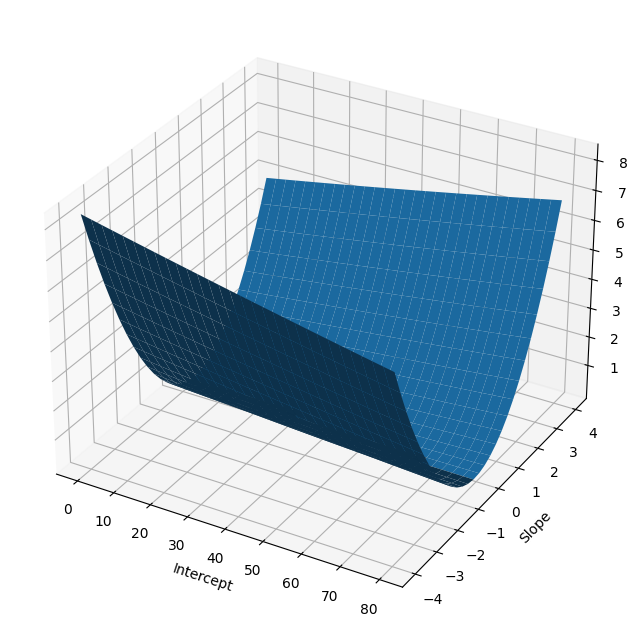

In [107]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(projection="3d")

W0 = np.linspace(-4, 4, 30)
W1 = np.linspace(0, 80, 30)

XX, YY = np.meshgrid(W1, W0)

Z = np.array([
    error(np.array([w1, w0]), X, Y)
    for w0, w1 in zip(XX.ravel(), YY.ravel())
])

Z = Z.reshape(len(XX), len(YY))

surf = ax.plot_surface(XX, YY, Z)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Finally, let's find optimal $w_0$ and $w_1$.

To achive that we're going to use *minimize* function from scipy.optimize module.

We will be looking optimal $w_0$ in range [-100,100] and $w_1$ in range [-5, 5].

In [108]:
x0 = np.array([0, 0])

result = scipy.optimize.minimize(
    error,
    x0=x0,
    args=(X, Y),
    method='L-BFGS-B',
    # bounds=((-5, 5), (-100, 100)),
)

print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67545.28708653705
        x: [ 8.201e-02  5.757e+01]
      nit: 6
      jac: [ 4.366e-03  1.455e-03]
     nfev: 48
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [109]:
w1, w0 = result.x
print('w0 = ', w0)
print('w1 = ', w1)

w0 =  57.57178747792938
w1 =  0.08200640227320354


In [110]:
error(np.array([1, 2]), X, Y)

96220578.37580049

In [111]:
error(np.array([w1, w0]), X, Y)

67545.28708653705

In [112]:
result

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 67545.28708653705
        x: [ 8.201e-02  5.757e+01]
      nit: 6
      jac: [ 4.366e-03  1.455e-03]
     nfev: 48
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

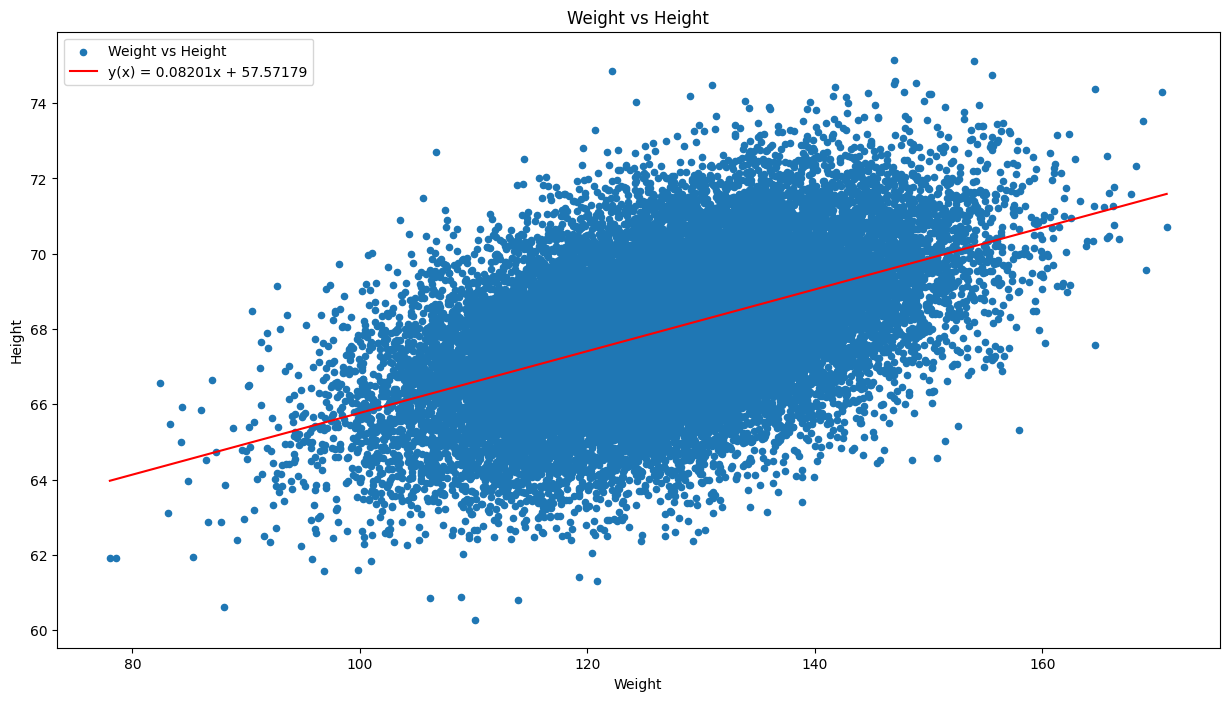

In [113]:
x = np.linspace(min(data['Weight']), max(data['Weight']), 100)
y = w0 + x * w1

data.plot(y='Height', x='Weight', kind='scatter', figsize=(15, 8), label='Weight vs Height')
plt.plot(x, y, '-r', label='y(x) = %sx + %s' % (round(w1, 5), round(w0, 5)))

plt.title('Weight vs Height')
plt.legend()
plt.show()

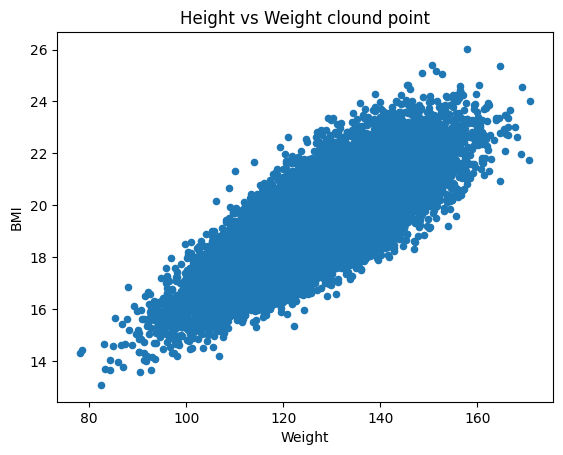

In [114]:
data.plot(y='BMI', x='Weight', kind='scatter', title='Height vs Weight clound point')
plt.show()

In [115]:
X = np.array([(x, 1) for x in data['Weight']])
Y = data['BMI']

In [116]:
x0 = np.array([0, 0])

result = scipy.optimize.minimize(
    error,
    x0=x0,
    args=(X, Y),
    method='L-BFGS-B',
    bounds=((-5, 5), (-100, 100)),
)

w1, w0 = result.x
print('w0 = ', w0)
print('w1 = ', w1)

w0 =  5.868090218183637
w1 =  0.10586580312398015


In [117]:
error(np.array([1, 2]), X, Y)

303910023.2220454

In [118]:
error(np.array([w1, w0]), X, Y)

22108.97864838494

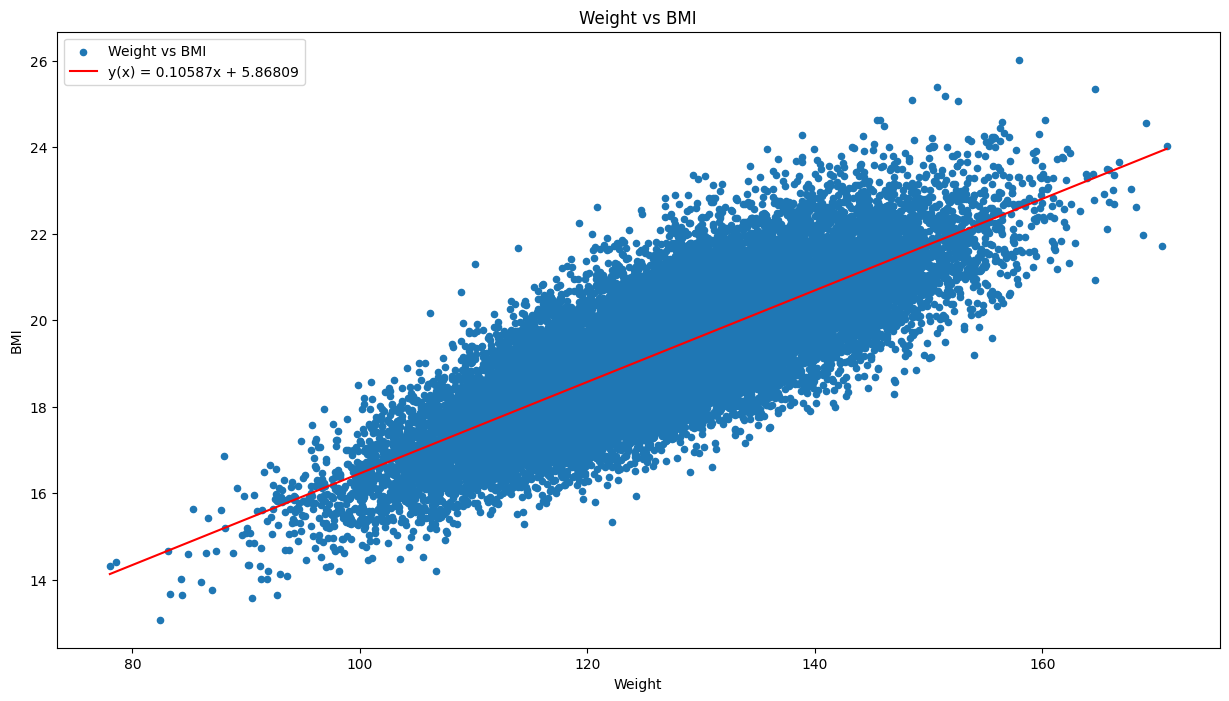

In [119]:
x = np.linspace(min(data['Weight']), max(data['Weight']), 100)
y = w0 + x * w1

data.plot(y='BMI', x='Weight', kind='scatter', figsize=(15, 8), label='Weight vs BMI')
plt.plot(x, y, '-r', label='y(x) = %sx + %s' % (round(w1, 5), round(w0, 5)))

plt.title('Weight vs BMI')
plt.legend()
plt.show()